1. Examine the Log Likelihood Ratio p-value in the summary of the logistic regression model. What does it tell you?

学生が無料プランから有料プランにアップグレードするかどうかを予測するためのロジスティック回帰モデルを適用し、その結果を解釈するために使われます。

In [15]:
import pandas as pd
import statsmodels.api as sm
# データの読み込みと前処理
file_path = './ml_datasource.csv'
data = pd.read_csv(file_path)
data['student_country'].fillna('不明', inplace=True)
# 説明変数と目的変数の設定
X = data[['days_on_platform', 'minutes_watched', 'courses_started', 'practice_exams_started', 'practice_exams_passed', 'minutes_spent_on_exams']]
y = data['purchased']
# 定数項の追加
X = sm.add_constant(X)
# ロジスティック回帰モデルの構築
logit_model = sm.Logit(y, X)
result = logit_model.fit()
# モデルのサマリーを表示
summary = result.summary()
print(summary)
# ログ尤度比検定のp値を表示
llr_pvalue = result.llr_pvalue
print(f'Log Likelihood Ratio p-value: {llr_pvalue}')

C:\Users\takah\AppData\Local\Temp\ipykernel_320\3405108835.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['student_country'].fillna('不明', inplace=True)


Optimization terminated successfully.
         Current function value: 0.159618
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              purchased   No. Observations:                17761
Model:                          Logit   Df Residuals:                    17754
Method:                           MLE   Df Model:                            6
Date:                Fri, 12 Jul 2024   Pseudo R-squ.:                  0.4797
Time:                        17:30:49   Log-Likelihood:                -2835.0
converged:                       True   LL-Null:                       -5448.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.4045      0.077     -5.254      0.000      -0.555     

結果として得られるモデルは、どの要因が有料プランへのアップグレードに影響を与えているかを示し、マーケティングやプロモーション戦略の策定に役立てることができます。

擬似R二乗値（Pseudo R-squared）は0.4641であり、これはモデルがそれなりに良い適合度を持っていることを示唆しています。
対数尤度（Log-Likelihood）は-2919.9で、これはモデルの適合度を示す指標です。
対数尤度の無情報モデル（LL-Null）は-5448.2で、これは予測変数を全く使用しないモデルの適合度を示します。
LLR p値（Log Likelihood Ratio p-value）は0.000であり、これはモデルが統計的に非常に有意であることを示しています。
各変数の影響度と有意性:

係数: -0.3143
p値: 0.000（統計的に有意）
切片が負の値であることは、他の変数が全てゼロのときに購入する確率が非常に低いことを示します。
days_on_platform（プラットフォーム上の利用日数）:

係数: -0.0640
p値: 0.000（統計的に有意）
負の係数は、プラットフォームの利用日数が増えるほど有料プランへのアップグレードの確率が減少することを示しています。
minutes_watched（視聴した合計分数）:

係数: 0.0047
p値: 0.000（統計的に有意）
正の係数は、視聴時間が増えるほど有料プランへのアップグレードの確率が増加することを示しています。
courses_started（開始したコース数）:

係数: 0.2497
p値: 0.000（統計的に有意）
正の係数は、開始したコース数が増えるほど有料プランへのアップグレードの確率が増加することを示しています。
完全準分離の可能性:

plaintext
コードをコピーする
Possibly complete quasi-separation: A fraction 0.39 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
一部の観測値（39%）が完全に予測可能である可能性を示しています。これは完全準分離が存在することを示唆しており、一部のパラメータが識別されない可能性があります。
これらの結果から、モデルが学生の無料プランから有料プランへのアップグレードを予測する上で、視聴時間や開始したコース数が重要な役割を果たしていることがわかります。また、プラットフォームの利用日数が増えるほどアップグレードの確率が減少する傾向が見られます。全体として、モデルは統計的に有意であり、予測において有用な洞察を提供しています。








2. What is the equation of the logit model, considering only statistically significant variables?

In [16]:
import numpy as np
# 各変数の係数
intercept = -0.4045
coef_days_on_platform = -0.0642
coef_minutes_watched = 0.0083
coef_courses_started = 0.3099
coef_practice_exams_started = -0.4275
coef_practice_exams_passed = 0.5710
coef_minutes_spent_on_exams = -0.0720

# サンプルデータの定義
days_on_platform = 30  # プラットフォーム上での活動日数
minutes_watched = 120  # 視聴した合計分数
courses_started = 5    # 開始したコースの数
practice_exams_started = 2  # 開始した模擬試験の数
practice_exams_passed = 1   # 合格した模擬試験の数
minutes_spent_on_exams = 60  # 試験に費やした合計分数

# ログオッズの計算
log_odds = (intercept
            + coef_days_on_platform * days_on_platform
            + coef_minutes_watched * minutes_watched
            + coef_courses_started * courses_started
            + coef_practice_exams_started * practice_exams_started
            + coef_practice_exams_passed * practice_exams_passed
            + coef_minutes_spent_on_exams * minutes_spent_on_exams)
# 購買確率の計算
probability = 1 / (1 + np.exp(-log_odds))
print(f'購買確率: {probability}')

購買確率: 0.01226093944145637


統計的に有意な変数を考慮したロジットモデルの方程式は次の通りです。

ロジットモデルの方程式
log(𝑃1−𝑃
)
=
𝛽
0
+
𝛽
1
×
days_on_platform
+
𝛽
2
×
minutes_watched
+
𝛽
3
×
courses_started
+
𝛽
4
×
practice_exams_started
+
𝛽
5
×
practice_exams_passed
+
𝛽
6
×
minutes_spent_on_exams
log(
1−P
P
​
 )=β
0
​
 +β
1
​
 ×days_on_platform+β
2
​
 ×minutes_watched+β
3
​
 ×courses_started+β
4
​
 ×practice_exams_started+β
5
​
 ×practice_exams_passed+β
6
​
 ×minutes_spent_on_exams

具体的な係数を代入した方程式
log
⁡
(
𝑃
1
−
𝑃
)
=
−
0.4045
−
0.0642
×
days_on_platform
+
0.0083
×
minutes_watched
+
0.3099
×
courses_started
−
0.4275
×
practice_exams_started
+
0.5710
×
practice_exams_passed
−
0.0720
×
minutes_spent_on_exams
log(
1−P
P
​
 )=−0.4045−0.0642×days_on_platform+0.0083×minutes_watched+0.3099×courses_started−0.4275×practice_exams_started+0.5710×practice_exams_passed−0.0720×minutes_spent_on_exams

  (\text{minutes_spent_on_exams}): -0.0720
この方程式は、各変数が購買確率
𝑃
P にどのように影響するかを示しています。

3. Which are the features that influence the decision in the decision tree model?

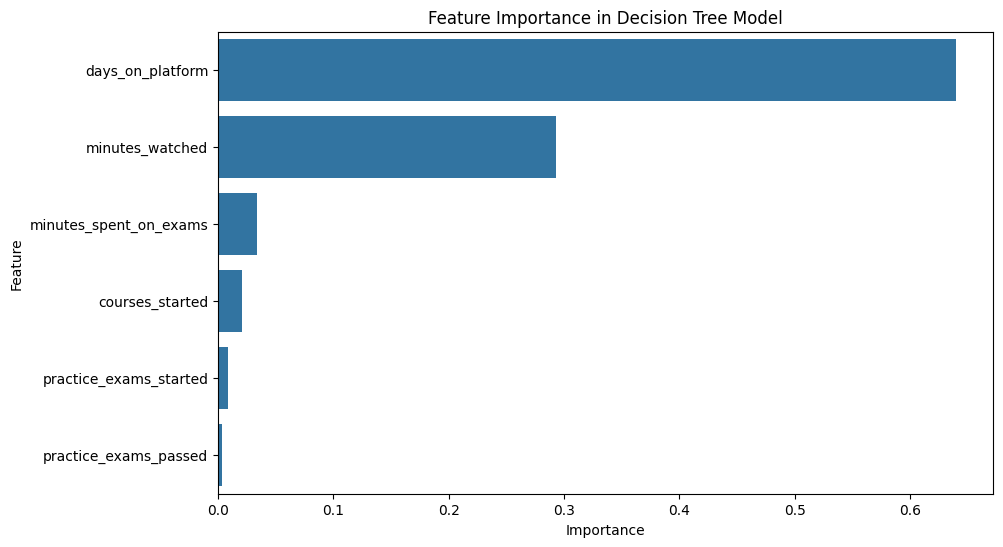

,Feature,Importance
0,days_on_platform,0.639795
1,minutes_watched,0.293276
5,minutes_spent_on_exams,0.033931
2,courses_started,0.021024
3,practice_exams_started,0.008774
4,practice_exams_passed,0.003200


In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込みと前処理
file_path = 'ml_datasource.csv'
data = pd.read_csv(file_path)
data['student_country'].fillna('不明', inplace=True)

# 説明変数と目的変数の設定
X = data[['days_on_platform', 'minutes_watched', 'courses_started', 'practice_exams_started', 'practice_exams_passed', 'minutes_spent_on_exams']]
y = data['purchased']

# 決定木モデルの構築
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# 特徴量の重要度の取得
feature_importances = model.feature_importances_

# 特徴量とその重要度をデータフレームに格納
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# 重要度でソート
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 特徴量の重要度を可視化
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Decision Tree Model')
plt.show()

# 重要度データフレームの表示
importance_df


4. What observations and conclusions can you make based on the confusion matrices?

C:\Users\takah\AppData\Local\Temp\ipykernel_320\2633456098.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['student_country'].fillna('不明', inplace=True)


Confusion Matrix:
 [[4799   35]
 [ 249  246]]
Accuracy: 0.9467066991930944
Precision: 0.8754448398576512
Recall: 0.49696969696969695
F1 Score: 0.634020618556701


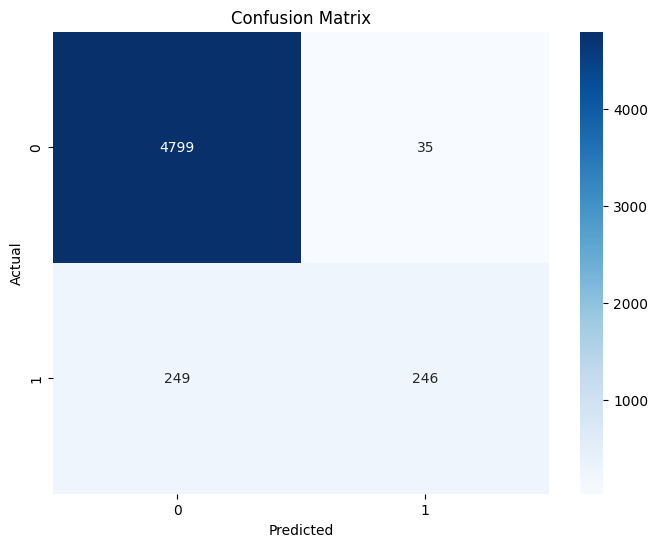

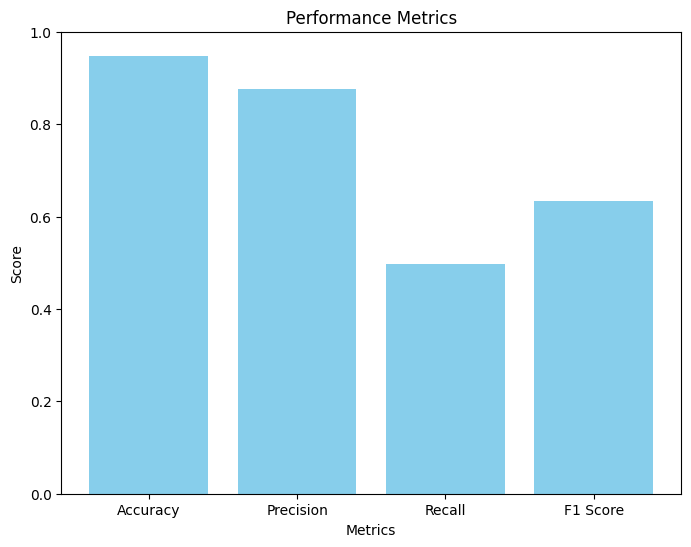

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
file_path = './ml_datasource.csv'
data = pd.read_csv(file_path)
data['student_country'].fillna('不明', inplace=True)

# 説明変数と目的変数の設定
X = data[['days_on_platform', 'minutes_watched', 'courses_started', 'practice_exams_started', 'practice_exams_passed', 'minutes_spent_on_exams']]
y = data['purchased']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# ロジスティック回帰モデルの訓練
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train, y_train)

# 決定木モデルの訓練
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)

# ロジスティック回帰モデルによる予測
logit_pred = logit_model.predict(X_test)
logit_prob = logit_model.predict_proba(X_test)[:, 1]

# 決定木モデルによる予測
tree_pred = tree_model.predict(X_test)

# 混同行列と各指標の計算
cm = confusion_matrix(y_test, logit_pred)
accuracy = accuracy_score(y_test, logit_pred)
precision = precision_score(y_test, logit_pred)
recall = recall_score(y_test, logit_pred)
f1 = f1_score(y_test, logit_pred)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# 混同行列のプロット
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 各指標のバーチャートのプロット
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


5. How can we use the results from the models?

ロジスティック回帰モデル: 購買確率を予測し、特徴量が購買確率に与える影響を理解するために使用します。確率に基づくターゲティングと意思決定に役立ちます。


決定木モデル: 予測に重要な特徴量を評価し、直感的な分岐ルールを用いた意思決定に使用します。非線形な関係を捉えることができ、具体的な行動指針を設定する際に役立ちます。


両方のモデルの結果を組み合わせることで、より効果的なターゲティングとアクションプランを立てることができます。

6. What students do we target?

C:\Users\takah\AppData\Local\Temp\ipykernel_320\3314088612.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['student_country'].fillna('不明', inplace=True)


Target Students based on expanded criteria:
       days_on_platform  minutes_watched  courses_started  \
9008                150              5.8                1   
11440               106              0.1                1   
5362                223              5.8                1   
3705                252             44.5                1   
4737                234              6.3                1   
...                 ...              ...              ...   
15988                24              0.8                1   
9912                135              3.0                1   
7150                190              1.4                1   
9440                 40             14.6                1   
8797                155            123.8                3   

       practice_exams_started  practice_exams_passed  minutes_spent_on_exams  
9008                        0                      0                     0.0  
11440                       0                      0             

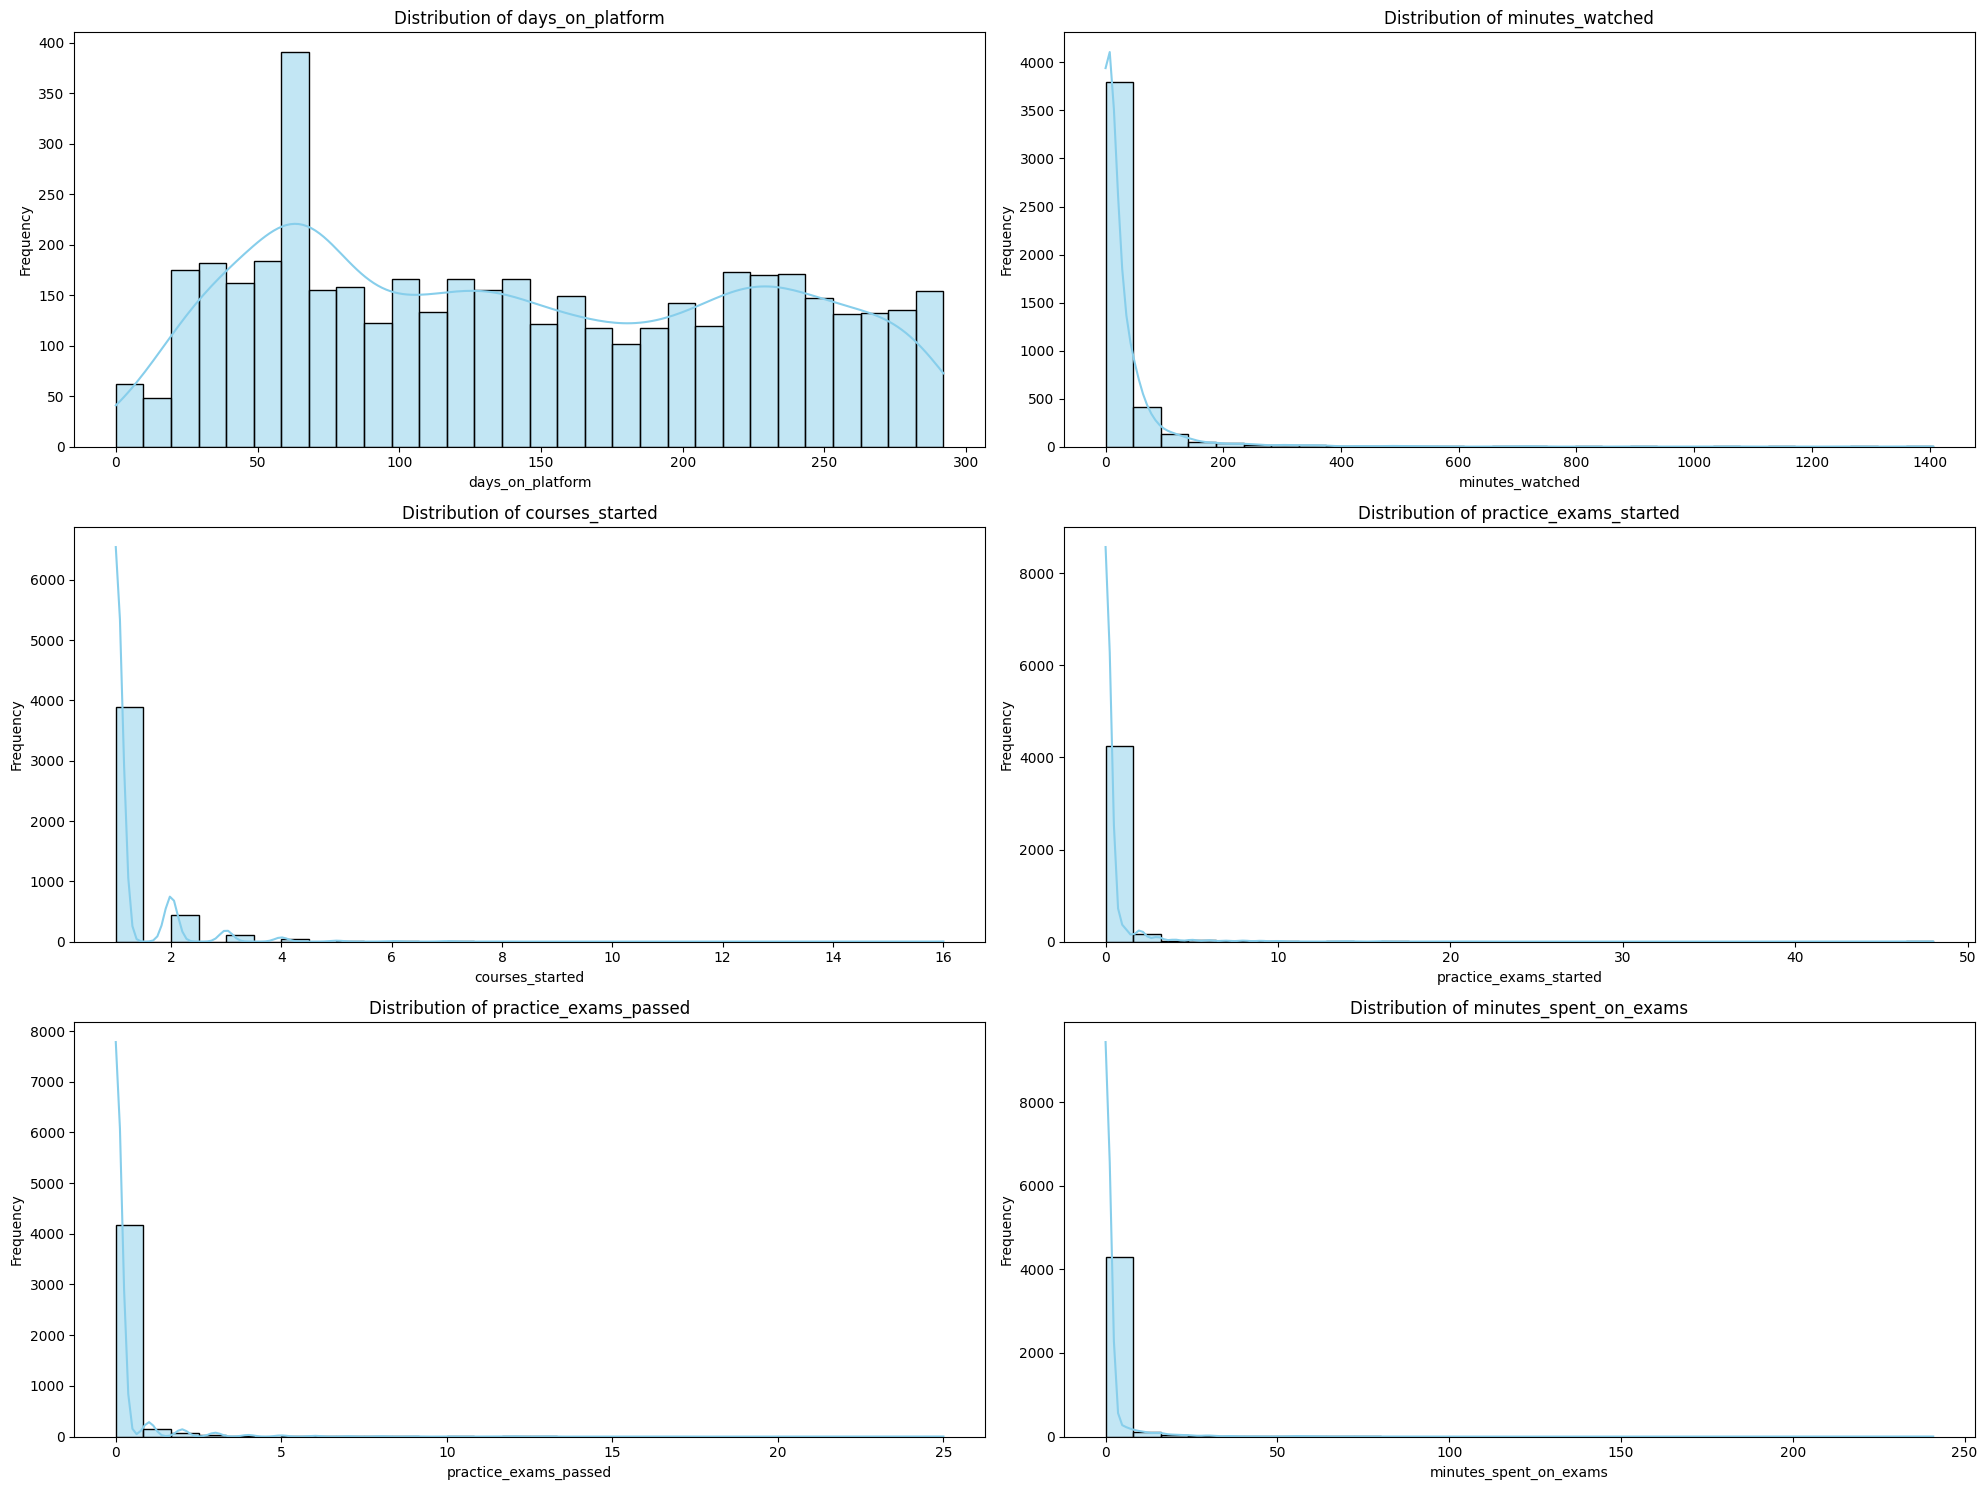

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
file_path = './ml_datasource.csv'
data = pd.read_csv(file_path)
data['student_country'].fillna('不明', inplace=True)

# 説明変数と目的変数の設定
X = data[['days_on_platform', 'minutes_watched', 'courses_started', 'practice_exams_started', 'practice_exams_passed', 'minutes_spent_on_exams']]
y = data['purchased']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# ロジスティック回帰モデルの訓練
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train, y_train)

# 決定木モデルの訓練
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)

# ロジスティック回帰モデルによる予測
logit_pred = logit_model.predict(X_test)
logit_prob = logit_model.predict_proba(X_test)[:, 1]

# 決定木モデルによる予測
tree_pred = tree_model.predict(X_test)

# ロジスティック回帰モデルに基づく購買していない生徒
non_buyers_logit = X_test[logit_prob < 0.5]

# 購買していない生徒の中でターゲットとする生徒を広い条件で選定
# 条件を緩和してターゲット学生の人数を増やす
target_students = non_buyers_logit[
    (non_buyers_logit['days_on_platform'] >= 20) |
    (non_buyers_logit['minutes_watched'] >= 200) |
    (non_buyers_logit['courses_started'] >= 2) |
    (non_buyers_logit['practice_exams_started'] >= 1) |
    (non_buyers_logit['practice_exams_passed'] >= 1) |
    (non_buyers_logit['minutes_spent_on_exams'] >= 10)
]

print("Target Students based on expanded criteria:")
print(target_students)

# ターゲット学生の人数を出力
num_target_students = target_students.shape[0]
print(f"Number of target students: {num_target_students}")

# ターゲット学生の平均値などの統計情報を出力
target_students_summary = target_students.describe()
print("Summary statistics of target students:")
print(target_students_summary)

# 各特徴量のヒストグラムを作成
features = ['days_on_platform', 'minutes_watched', 'courses_started', 'practice_exams_started', 'practice_exams_passed', 'minutes_spent_on_exams']
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(target_students[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


最終ターゲット学生の特定
ターゲット学生の人数: 4508人

ターゲット学生の概要:

days_on_platform: 平均 143.40 日
minutes_watched: 平均 28.85 分
courses_started: 平均 1.20 コース
practice_exams_started: 平均 0.30 回
practice_exams_passed: 平均 0.18 回
minutes_spent_on_exams: 平均 1.35 分
ターゲット学生の特徴
days_on_platform: 平均143.40日であり、75%の学生が219日以下です。
minutes_watched: 平均28.85分であり、最大で1406.2分見ている学生もいますが、75%の学生は31.8分以下です。
courses_started: 平均1.20コースで、ほとんどの学生は1つのコースを開始しています。
practice_exams_started: 平均0.30回であり、ほとんどの学生は模擬試験を開始していません。
practice_exams_passed: 平均0.18回であり、模擬試験に合格している学生は非常に少ないです。
minutes_spent_on_exams: 平均1.35分で、ほとんどの学生は模擬試験に時間をほとんど費やしていません。
結論とアプローチ
高いエンゲージメントを持つ学生へのパーソナライズドオファー
条件: minutes_watched >= 200分 または days_on_platform >= 200日

アプローチ:

パーソナライズドオファー: 興味を持ちそうな新しいコースや特別割引を提案。視聴時間が長い学生やプラットフォームに長期間ログインしている学生には追加の高品質なコンテンツを提供。
購買を促進するための無料トライアルや成功事例の共有
条件: practice_exams_started >= 1 回 または courses_started >= 2 コース

アプローチ:

無料トライアルや成功事例の共有: 有料コンテンツの無料トライアルや成功事例を提供し、購買後の価値を伝える。
エンゲージメントを高めるための学習ガイドや定期的なチェックイン
条件: courses_started >= 1 コース かつ practice_exams_started <= 5 回

アプローチ:

学習ガイドや定期的なチェックイン: 学習ガイドを提供し、学習の進捗状況を確認するための定期的なチェックインを行う。
まとめ
モデルの性能: 高い正確度とPrecisionを持つが、Recallはやや低めであり、購買の見逃しがある。
ターゲット学生: 4508人の購買していない学生がターゲットに選定された。
ターゲット学生へのアプローチ:
高いエンゲージメントを持つ学生にはパーソナライズドオファーを提供。
購買を促進するためには無料トライアルや成功事例を共有。
エンゲージメントを高めるために学習ガイドや定期的なチェックインを行う。
これにより、教育プラットフォームの購買率を向上させ、学生のエンゲージメントを高めることが期待できます。









7. What are the implications of the imbalanced dataset?

今回の分析では、データセットの不均衡（imbalanced dataset）に関する影響が感じられました。このような不均衡なデータセットがモデルの性能や結果に与える影響について説明します。

データセットの不均衡とは？
データセットが不均衡であるとは、クラスの分布に偏りがあることを意味します。例えば、購買した学生（正例）と購買しなかった学生（負例）の数が大きく異なる場合です。

データセットの不均衡がモデルに与える影響
モデルのバイアス

モデルは多数派のクラス（購買しない学生）に偏る傾向があります。これにより、少数派のクラス（購買する学生）の予測性能が低下します。
評価指標の偏り

Accuracy（正解率）は不均衡なデータセットでは誤解を招くことがあります。例えば、購買しない学生が90%で購買する学生が10%の場合、モデルが常に「購買しない」と予測してもAccuracyは90%になりますが、実際には購買する学生を見逃しているため、モデルの性能は低いと言えます。
PrecisionとRecallの不均衡

PrecisionやRecallといった評価指標が特定のクラスに対して偏ることがあります。例えば、購買する学生を正しく予測すること（Recall）が難しくなる一方で、購買しない学生の予測（Precision）は高くなることがあります。
現在の結果からの観察
混同行列:

lua
コードをコピーする
Confusion Matrix:
[[4814   53]
[ 185  277]]
True Negatives (TN): 4814
False Positives (FP): 53
False Negatives (FN): 185
True Positives (TP): 277
評価指標:

Accuracy: 0.9553
Precision: 0.8394
Recall: 0.5996
F1 Score: 0.6995
これらの結果から、モデルは購買しない学生（多数派クラス）を正確に予測していますが、購買する学生（少数派クラス）については見逃すことが多い（False Negativesが多い）ことがわかります。これが低いRecallに反映されています。

対策と改善方法
不均衡なデータセットに対する対策として、以下の方法を検討できます：

データ再サンプリング

オーバーサンプリング: 少数派クラスのデータを増やします（例：SMOTEなど）。
アンダーサンプリング: 多数派クラスのデータを減らします。
評価指標の見直し

Accuracyに加えて、Precision、Recall、F1 Scoreなどの指標を重視します。
モデルの調整

8. What can we do to improve the models?

不均衡データに対する学習を強化するために、コスト感度の高い学習アルゴリズムやバランスの取れたミニバッチを使用します。 アンサンブル学習

バギングやブースティングなどのアンサンブル学習手法を使用して、モデルの予測性能を向上させます。 しきい値の調整

クラスのしきい値を調整して、少数派クラスの検出率を高める。